In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
#import scikit_learn as sklearn

In [2]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
dtype: object

In [3]:
txns.timestep

0       38
1       68
2       69
3       46
4       50
        ..
3953     4
3954    75
3955    79
3956    83
3957    91
Name: timestep, Length: 3958, dtype: int64

# define X

In [4]:
from sklearn.cluster import KMeans

In [5]:
X = txns.timestep.to_numpy().reshape(-1,1)
X = txns.time.to_numpy().reshape(-1,1)

(array([   4.,    2.,   11.,  116.,  658., 1359., 1318.,  405.,   70.,
          15.]),
 array([19296.01041667, 19296.109375  , 19296.20833333, 19296.30729167,
        19296.40625   , 19296.50520833, 19296.60416667, 19296.703125  ,
        19296.80208333, 19296.90104167, 19297.        ]),
 <BarContainer object of 10 artists>)

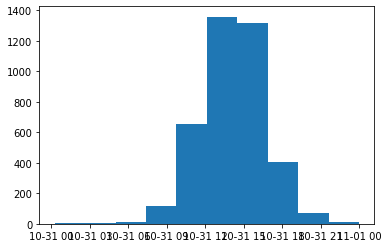

In [6]:
plt.hist(X)

In [7]:
X.shape

(3958, 1)

In [8]:
txns.timestep

0       38
1       68
2       69
3       46
4       50
        ..
3953     4
3954    75
3955    79
3956    83
3957    91
Name: timestep, Length: 3958, dtype: int64

In [9]:
txns.iloc[:15]

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00
5,51,2022-10-31 12:45:00,2,446,normal,-20.417758,2022-10-31 12:45:00
6,53,2022-10-31 13:15:00,2,753,normal,-23.502230,2022-10-31 13:15:00
7,56,2022-10-31 14:00:00,2,380,normal,-24.434463,2022-10-31 14:00:00
8,46,2022-10-31 11:30:00,3,1001,normal,-20.470621,2022-10-31 11:30:00
9,50,2022-10-31 12:30:00,3,547,normal,-29.841563,2022-10-31 12:30:00


In [10]:
print('mean time', txns[txns.sender_type=='normal'].time.mean())
print('mean time', txns[txns.sender_type=='suspicious'].time.mean())
txns.sender_type.value_counts()

mean time 2022-10-31 14:04:52.666157312
mean time 2022-10-31 17:35:48.387097088


normal        3927
suspicious      31
Name: sender_type, dtype: int64

In [11]:
txns.dtypes

timestep                     int64
timestep_to_time            object
sender_id                    int64
receiver_id                  int64
sender_type                 object
amount                     float64
time                datetime64[ns]
dtype: object

In [12]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00
...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00


## kmeans

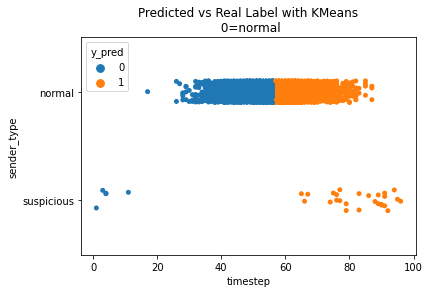

In [13]:
y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)

txns['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
plt.subplots()
np.random.seed(123)
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title('Predicted vs Real Label with KMeans\n 0=normal')
#sns.stripplot(X.flatten())
plt.show()

## Gaussian Mixture

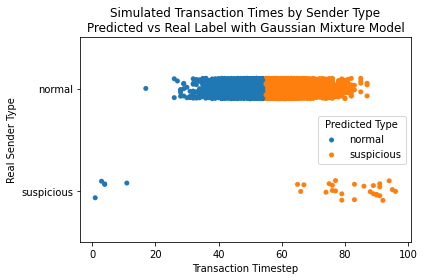

In [14]:
from sklearn import mixture
y_pred = KMeans(
        n_clusters=2
    ).fit_predict(X)

clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
y_pred = clf.fit_predict(X)

txns['y_pred'] = y_pred
np.random.seed(123)
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title('Simulated Transaction Times by Sender Type\nPredicted vs Real Label with Gaussian Mixture Model')
plt.ylabel('Real Sender Type')
plt.xlabel('Transaction Timestep')
plt.legend(title='Predicted Type', labels=['normal','suspicious'])
plt.tight_layout()
plt.show()

In [15]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00,0
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00,1
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00,1
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00,0
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00,0
...,...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00,0
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00,1
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00,1
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00,1


In [16]:
# group by node id? and then add in and out degrees? and number of tranasactions / transaction times? 
# each transaction time could be a feature... but how to do it... one hot encoding?
# or just... mean timestep and stddev?


 

In [17]:
#txns['y_true'] = [0 if txn.sender_type=='normal' else 1 for txn in txns]
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00,0,0
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00,1,0
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00,1,0
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00,0,0
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00,0,1
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00,1,1
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00,1,1
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00,1,1


## confusion matrix

[[1634 2293]
 [   5   26]]
accuracy:  0.41940373926225366
mcc:  0.04560123914554324
              precision    recall  f1-score   support

           0       1.00      0.42      0.59      3927
           1       0.01      0.84      0.02        31

    accuracy                           0.42      3958
   macro avg       0.50      0.63      0.30      3958
weighted avg       0.99      0.42      0.58      3958



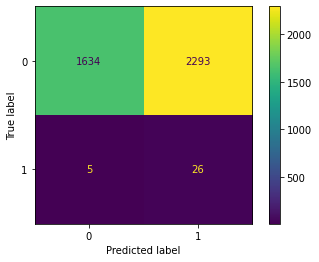

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
from sklearn.metrics import matthews_corrcoef 
c_matrix = confusion_matrix(txns.y_true, txns.y_pred)
print(c_matrix)
print('accuracy: ', accuracy_score(txns.y_true, txns.y_pred))
print('mcc: ', matthews_corrcoef(txns.y_true, txns.y_pred))
print(classification_report(txns.y_true, txns.y_pred))
ConfusionMatrixDisplay(c_matrix).plot()


In [19]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [20]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00,0,0
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00,1,0
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00,1,0
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00,0,0
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00,0,1
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00,1,1
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00,1,1
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00,1,1


## isolation forest

In [21]:
print(txns.y_true.value_counts())
#print(txns.y_pred.value_counts())
(txns.y_pred!=1).value_counts()

0    3927
1      31
Name: y_true, dtype: int64


False    2319
True     1639
Name: y_pred, dtype: int64

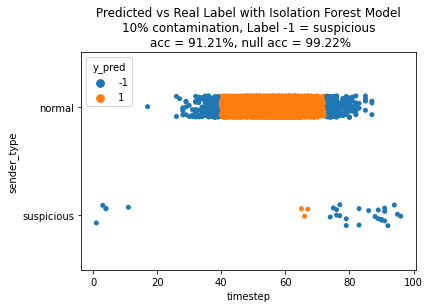

In [22]:
from sklearn.ensemble import IsolationForest
y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)

txns['y_pred'] = y_pred
np.random.seed(123)
null_acc = accuracy_score(txns.y_true, np.zeros(txns.y_true.shape[0])) # ytrue, ypred # predict all 0s (majority class)
acc = accuracy_score(txns.y_true, txns.y_pred==-1 )  # outlier is -1
sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )
plt.title(f'Predicted vs Real Label with Isolation Forest Model\n10% contamination, Label -1 = suspicious\n acc = {acc*100:.2f}%, null acc = {null_acc*100:.2f}%')
plt.show()

# classify using in/out degree features

In [23]:
# varying: small amounts late at night. uhm. other variations between sender / receiver

edges = pd.read_csv('nx_edges_list.csv')

In [24]:
edges

,nx_node_A,nx_node_B
0,1,664
1,1,477
2,1,60
3,2,930
4,2,638
...,...,...
3953,1009,143
3954,1009,1004
3955,1009,1001
3956,1009,1004


In [25]:
node_degs = pd.read_csv('tabular_graph_features.csv')

In [26]:
node_degs

,node_id,in_degree,out_degree
0,1,2,3
1,664,6,3
2,477,5,7
3,60,4,5
4,2,3,5
...,...,...,...
1005,946,1,5
1006,916,0,3
1007,955,0,4
1008,976,0,2


# convert to by_id vs by_txns

In [27]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00,-1,0
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00,1,0
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00,1,0
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00,1,0
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00,1,0
...,...,...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00,-1,1
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00,-1,1
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00,-1,1
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00,-1,1


In [28]:
true_agent_labels = pd.read_csv('agents_list.csv')
true_agent_labels.columns=['sender_id', 'true_sender_type']
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
990,1006,suspicious
991,1007,suspicious
992,1008,suspicious
993,1009,suspicious


In [29]:
txns.groupby(['sender_id'])[['sender_id', 'timestep', 'y_pred', 'y_true']].value_counts()

txns_by_id = txns[['sender_id' , 'timestep', 'y_pred', 'y_true']]
txns_by_id = txns_by_id.pivot(index='sender_id', columns='timestep', values='y_true')
txns_by_id

txns_by_id['sum'] = txns_by_id.sum()
txns_by_id.reset_index()[['sender_id', 'sum']].fillna(0) 
txns_by_id['agent_label'] = txns_by_id['sum'] >= 1
pred_by_agent = txns_by_id[['agent_label']] * 1 

In [30]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
990,1006,suspicious
991,1007,suspicious
992,1008,suspicious
993,1009,suspicious


In [31]:
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
990,1006,suspicious,1
991,1007,suspicious,1
992,1008,suspicious,1
993,1009,suspicious,1


# error analysis per agent

In [32]:
errors = pred_by_agent.reset_index().merge(true_agent_labels) 
errors['wrong_pred'] = errors.agent_label == errors.true_label
errors.wrong_pred.sum() / errors.shape[0]

0.9688442211055276

In [33]:
txns_by_id.sum() != 0

timestep
1               True
3               True
4               True
11              True
17             False
               ...  
94              True
95              True
96              True
sum             True
agent_label     True
Length: 76, dtype: bool

In [34]:
txns[txns.sender_id == 5]
txns.sender_id.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
         57,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,
         69,   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,
         80,   81,   82,   83,   84,   85,   86,   87,   88,   89,   90,
         91,   92,   93,   94,   95,   96,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
        113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,
        124,  125,  127,  128,  129,  130,  131,  132,  133,  134,  135,
        136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,
        147,  148,  149,  150,  151,  152,  153,  1

In [35]:
sender_info = pd.DataFrame(txns.sender_id.unique(), columns=['sender_id'])
sender_info

,sender_id
0,1
1,2
2,3
3,4
4,5
...,...
990,1006
991,1007
992,1008
993,1009


In [36]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,38,2022-10-31 09:30:00,1,664,normal,-21.101671,2022-10-31 09:30:00,-1,0
1,68,2022-10-31 17:00:00,1,477,normal,-20.615814,2022-10-31 17:00:00,1,0
2,69,2022-10-31 17:15:00,1,60,normal,-19.045538,2022-10-31 17:15:00,1,0
3,46,2022-10-31 11:30:00,2,930,normal,-15.709433,2022-10-31 11:30:00,1,0
4,50,2022-10-31 12:30:00,2,638,normal,-28.146545,2022-10-31 12:30:00,1,0
...,...,...,...,...,...,...,...,...,...
3953,4,2022-10-31 01:00:00,1009,143,suspicious,-19.325030,2022-10-31 01:00:00,-1,1
3954,75,2022-10-31 18:45:00,1009,1004,suspicious,-29.573180,2022-10-31 18:45:00,-1,1
3955,79,2022-10-31 19:45:00,1009,1001,suspicious,-19.328795,2022-10-31 19:45:00,-1,1
3956,83,2022-10-31 20:45:00,1009,1004,suspicious,-19.157436,2022-10-31 20:45:00,-1,1


# try to extract timesteps again; just do loop 

In [37]:
sender_info['txns'] = None
sender_info['txn_mean_time'] = None
# convert datatype to numpy array
sender_info.txns = sender_info.txns.astype(object)
display(sender_info.sample())

all_my_txns = []
#for id in [1,2]:
for id in sender_info.sender_id:
    my_txns = txns[txns.sender_id == id].timestep
    #print(my_txns.to_list())
    all_my_txns.append(my_txns.to_list())
sender_info['txns'] = pd.Series(all_my_txns)
display(sender_info.iloc[1])
sender_info['txn_mean_time'] = sender_info['txns'].apply(np.mean)
#sender_info['label_by_mean_txn_time'] = 
sender_info


,sender_id,txns,txn_mean_time
305,312,None,None


sender_id                           2
txns             [46, 50, 51, 53, 56]
txn_mean_time                    None
Name: 1, dtype: object

,sender_id,txns,txn_mean_time
0,1,"[38, 68, 69]",58.333333
1,2,"[46, 50, 51, 53, 56]",51.200000
2,3,"[46, 50, 52, 56, 59]",52.600000
3,4,"[33, 39, 48, 55, 73]",49.600000
4,5,"[40, 53, 55, 62, 70]",56.000000
...,...,...,...
990,1006,"[1, 89, 91]",60.333333
991,1007,"[3, 89, 90, 95, 96]",74.600000
992,1008,"[66, 76]",71.000000
993,1009,"[4, 75, 79, 83]",60.250000


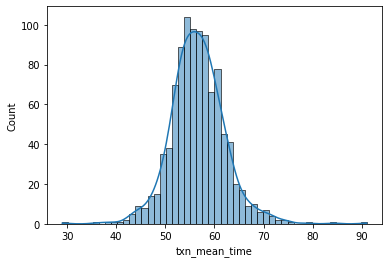

In [38]:
fig, ax = plt.subplots()
plt.set_xlim = [0,100]
sns.histplot(sender_info['txn_mean_time'], ax=ax, kde=True , bins=50)
#sns.kdeplot(sender_info['txn_mean_time'], ax=ax)
plt.show()

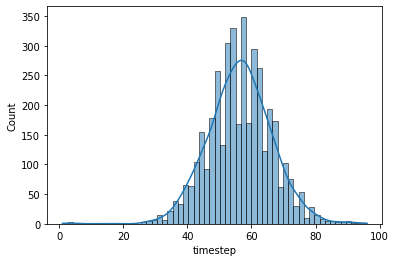

In [39]:
plt.subplots()
plt.xlim = [0,100]
sns.histplot(txns.timestep, kde=True)
plt.show()

In [40]:
true_agent_labels.sample()

,sender_id,true_sender_type,true_label
647,660,normal,0


In [41]:
sender_info = sender_info.merge(true_agent_labels)

/Users/owls/v3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_mean_time', ylabel='Count'>

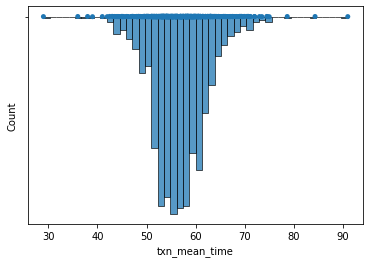

In [42]:
sns.stripplot(sender_info['txn_mean_time'],)#, type=)
sns.histplot(sender_info['txn_mean_time'])#, type=)

In [43]:
sender_info

,sender_id,txns,txn_mean_time,true_sender_type,true_label
0,1,"[38, 68, 69]",58.333333,normal,0
1,2,"[46, 50, 51, 53, 56]",51.200000,normal,0
2,3,"[46, 50, 52, 56, 59]",52.600000,normal,0
3,4,"[33, 39, 48, 55, 73]",49.600000,normal,0
4,5,"[40, 53, 55, 62, 70]",56.000000,normal,0
...,...,...,...,...,...
990,1006,"[1, 89, 91]",60.333333,suspicious,1
991,1007,"[3, 89, 90, 95, 96]",74.600000,suspicious,1
992,1008,"[66, 76]",71.000000,suspicious,1
993,1009,"[4, 75, 79, 83]",60.250000,suspicious,1


# plot with true hue 

<AxesSubplot:xlabel='txn_mean_time', ylabel='Count'>

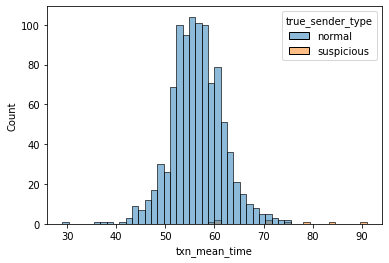

In [44]:
sns.histplot(data=sender_info, x='txn_mean_time', hue='true_sender_type')

# create in / out degree table

In [45]:
node_degs.columns=['sender_id', 'in_degree', 'out_degree']
node_degs

,sender_id,in_degree,out_degree
0,1,2,3
1,664,6,3
2,477,5,7
3,60,4,5
4,2,3,5
...,...,...,...
1005,946,1,5
1006,916,0,3
1007,955,0,4
1008,976,0,2


In [46]:
sender_info = sender_info.merge(node_degs)
sender_info



,sender_id,txns,txn_mean_time,true_sender_type,true_label,in_degree,out_degree
0,1,"[38, 68, 69]",58.333333,normal,0,2,3
1,2,"[46, 50, 51, 53, 56]",51.200000,normal,0,3,5
2,3,"[46, 50, 52, 56, 59]",52.600000,normal,0,4,5
3,4,"[33, 39, 48, 55, 73]",49.600000,normal,0,4,5
4,5,"[40, 53, 55, 62, 70]",56.000000,normal,0,0,5
...,...,...,...,...,...,...,...
990,1006,"[1, 89, 91]",60.333333,suspicious,1,32,3
991,1007,"[3, 89, 90, 95, 96]",74.600000,suspicious,1,34,5
992,1008,"[66, 76]",71.000000,suspicious,1,35,2
993,1009,"[4, 75, 79, 83]",60.250000,suspicious,1,41,3


# kmeans  / isolation forest classification

In [47]:
sender_info['y_pred_type'] = sender_info.y_pred.apply(lambda x: 'normal' if x == 1 else 'suspicious')
sender_info

AttributeError: 'DataFrame' object has no attribute 'y_pred'

/Users/owls/v3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


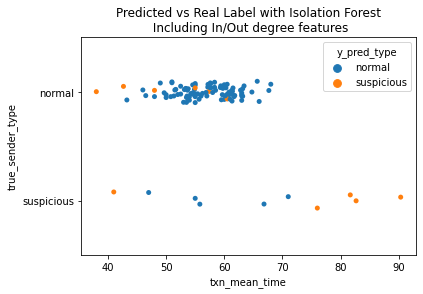

In [ ]:
X = sender_info[['txn_mean_time' , 'in_degree', 'out_degree']]
# DEFINITELY don't leave sender id in there

#y_pred = KMeans(
        #n_clusters=2
    #).fit_predict(X)
#
np.random.seed(123)
y_pred = IsolationForest(random_state=0, contamination=0.1).fit_predict(X)
sender_info['y_pred'] = y_pred
colors = ['r' if label==0 else 'b' for label in y_pred]
#-- plot disaggregated by prediction (vs true) 
#plt.subplots()
#sns.stripplot(data=sender_info, x='txn_mean_time', 
#    y='y_pred_type', hue='true_sender_type', )

#-- plot disaggregated by true label 
plt.subplots()
sns.stripplot(data=sender_info, x='txn_mean_time', y='true_sender_type', hue='y_pred_type', )
plt.title('Predicted vs Real Label with Isolation Forest\n Including In/Out degree features')
b
plt.show()

In [ ]:
sender_info[sender_info.true_label == 1][['out_degree']].value_counts()
sender_info[sender_info.true_label == 0][['out_degree']].value_counts()
#sender_info[sender_info.true_label == 1].in_degree.value_counts()

out_degree
4             27
3             15
5             14
2             11
1              9
7              9
6              8
8              2
9              2
dtype: int64

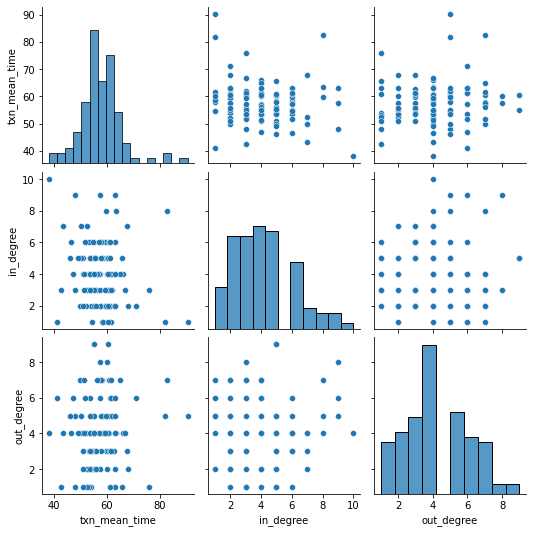

In [ ]:
sns.pairplot(sender_info[['txn_mean_time', 'in_degree', 'out_degree']])

In [ ]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
0,49,2022-10-31 12:15:00,1,13,normal,-24.072471,2022-10-31 12:15:00,1,0
1,59,2022-10-31 14:45:00,1,104,normal,-19.744455,2022-10-31 14:45:00,1,0
2,60,2022-10-31 15:00:00,1,17,normal,-13.156018,2022-10-31 15:00:00,1,0
3,49,2022-10-31 12:15:00,2,49,normal,-24.057991,2022-10-31 12:15:00,1,0
4,53,2022-10-31 13:15:00,2,35,normal,-23.502230,2022-10-31 13:15:00,1,0
...,...,...,...,...,...,...,...,...,...
410,81,2022-10-31 20:15:00,109,52,suspicious,-24.269552,2022-10-31 20:15:00,-1,1
411,95,2022-10-31 23:45:00,109,34,suspicious,-23.883216,2022-10-31 23:45:00,-1,1
412,67,2022-10-31 16:45:00,110,70,suspicious,-13.590539,2022-10-31 16:45:00,1,1
413,77,2022-10-31 19:15:00,110,66,suspicious,-14.961103,2022-10-31 19:15:00,1,1


In [ ]:
txns[(txns.sender_id == 1)].timestep.mean()

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_pred,y_true
375,1,2022-10-31 00:15:00,101,36,suspicious,-16.037316,2022-10-31 00:15:00,-1,1
376,75,2022-10-31 18:45:00,101,62,suspicious,-16.531232,2022-10-31 18:45:00,1,1
377,89,2022-10-31 22:15:00,101,54,suspicious,-14.154957,2022-10-31 22:15:00,-1,1
378,70,2022-10-31 17:30:00,102,101,suspicious,-22.854613,2022-10-31 17:30:00,1,1
379,74,2022-10-31 18:30:00,102,75,suspicious,-18.041908,2022-10-31 18:30:00,1,1
380,83,2022-10-31 20:45:00,102,73,suspicious,-26.007443,2022-10-31 20:45:00,-1,1
381,85,2022-10-31 21:15:00,102,77,suspicious,-22.310860,2022-10-31 21:15:00,-1,1
382,87,2022-10-31 21:45:00,102,80,suspicious,-23.998007,2022-10-31 21:45:00,-1,1
383,91,2022-10-31 22:45:00,102,75,suspicious,-11.597201,2022-10-31 22:45:00,-1,1
384,85,2022-10-31 21:15:00,103,6,suspicious,-21.620427,2022-10-31 21:15:00,-1,1
